# Machine Learning with Tree-Based Models in Python

👋 Welcome to workspace!

In [1]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Importing course datasets as DataFrames
auto = pd.read_csv('datasets/auto.csv')
bikes = pd.read_csv('datasets/bikes.csv')
liver_disease = pd.read_csv('datasets/indian_liver_patient_preprocessed.csv', index_col=0)
wbc = pd.read_csv('datasets/wbc.csv') # Wisconsin Breast Cancer Dataset

wbc.head() # Preview the first five rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
wbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
wbc.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
X = wbc.drop(['id', 'diagnosis', 'Unnamed: 32'], axis='columns')

In [5]:
y = wbc['diagnosis']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

## Training classification tree

In [11]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=42)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:8])

[0 1 1 0 0 1 1 1]


In [12]:
y_test[0:8]

array([0, 1, 1, 0, 0, 1, 1, 1])

## Evaluate the classification tree

In [13]:
# Import accuracy_score
from sklearn.metrics import accuracy_score, f1_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test,y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.94


## Logistic regression vs classification tree

In [14]:
import mlxtend.plotting

def plot_labeled_decision_regions(X_test, y_test, clfs):
    
    for clf in clfs:

        mlxtend.plotting.plot_decision_regions(np.array(X_test), np.array(y_test), clf=clf, legend=2)
        
        plt.ylim((0,0.2))

        # Adding axes annotations
        plt.xlabel(X_cols[0])
        plt.ylabel(X_cols[1])
        plt.title(str(clf).split('(')[0])
        plt.show()

In [15]:
X_cols = wbc[['radius_mean','concave points_mean']].columns

In [16]:
X = wbc[['radius_mean', 'concave points_mean']]

In [17]:
X

,radius_mean,concave points_mean
0,17.99,0.14710
1,20.57,0.07017
2,19.69,0.12790
3,11.42,0.10520
4,20.29,0.10430
...,...,...
564,21.56,0.13890
565,20.13,0.09791
566,16.60,0.05302
567,20.60,0.15200


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [20]:
X_test

,radius_mean,concave points_mean
204,12.47,0.03821
70,18.94,0.07951
131,15.46,0.08087
431,12.40,0.02799
540,11.54,0.02594
...,...,...
486,14.64,0.02791
75,16.07,0.06638
249,11.52,0.02929
238,14.22,0.04408


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


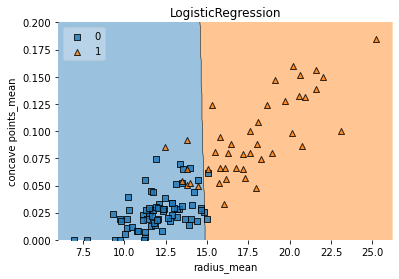

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


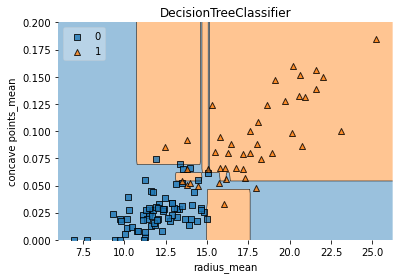

In [21]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)
# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

## Using entropy as a criterion

In [22]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

## Using gini as a criterion

In [23]:
# Instantiate dt_entropy, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_gini to the training set
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

### Entropy vs Gini index

In [24]:
# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)
# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}')

Accuracy achieved by using entropy: 0.904
Accuracy achieved by using the gini index: 0.904


## Decision tree for regression

In [25]:
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [26]:
X = auto[['displ', 'hp', 'weight', 'accel', 'size', 'origin']]
y = auto['mpg']

In [27]:
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder = OneHotEncoder()
OneHotEncodings = OneHotEncoder.fit_transform(auto[['origin']]).toarray()
OneHotEncodings = pd.DataFrame(OneHotEncodings,
                               columns = ['origin_'+header for header in OneHotEncoder.categories_[0]])

X = X.drop(columns = 'origin').reset_index(drop=True)
X = pd.concat((X,OneHotEncodings),axis=1)

In [28]:
X.head()

,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,250.0,88,3139,14.5,15.0,0.0,0.0,1.0
1,304.0,193,4732,18.5,20.0,0.0,0.0,1.0
2,91.0,60,1800,16.4,10.0,1.0,0.0,0.0
3,250.0,98,3525,19.0,15.0,0.0,0.0,1.0
4,97.0,78,2188,15.8,10.0,0.0,1.0,0.0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [30]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

## Evaluate the regression tree

In [31]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = (mse_dt)**.5

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.27


## Linear regression vs regression tree

In [32]:
# Import necessary modules
from sklearn.linear_model import LinearRegression

In [33]:
# Create the regressor: reg_all
lr = LinearRegression()

# Fit the regressor to the training data
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

In [35]:
# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**.5

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 3.98
Regression Tree test set RMSE: 4.27


## Diagnose bias and variance problems

In [36]:
auto

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0
...,...,...,...,...,...,...,...
387,18.0,250.0,88,3021,16.5,US,15.0
388,27.0,151.0,90,2950,17.3,US,10.0
389,29.5,98.0,68,2135,16.6,Asia,10.0
390,17.5,250.0,110,3520,16.4,US,15.0


In [37]:
# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=.26, random_state=SEED)

In [38]:
dt

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=1)

## Evaluate the 10-fold CV error

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


## Evaluate the training error

In [41]:
# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**.5

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


In [42]:
y_pred_test = dt.predict(X_test)

# Evaluate the training set RMSE of dt
RMSE_test = (MSE(y_test, y_pred_test))**.5

# Print RMSE_train
print('Test RMSE: {:.2f}'.format(RMSE_test))

Test RMSE: 4.86


## Ensemble Learning

In [43]:
liver_disease

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1
...,...,...,...,...,...,...,...,...,...,...,...
578,0.938909,-0.452462,-0.495414,0.857336,-0.333977,-0.263863,-0.536763,-1.938290,-1.807188,1,0
579,-0.295067,-0.436391,-0.495414,-0.794596,-0.252021,-0.274222,-0.444487,0.077462,0.478949,1,1
580,0.445318,-0.404249,-0.459878,-0.190532,-0.180993,-0.212067,-0.075383,0.077462,0.165780,1,1
581,-0.850356,-0.323893,-0.353271,-0.441198,-0.284804,-0.270769,0.293722,0.329431,0.165780,1,1


In [44]:
liver_disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age_std                         579 non-null    float64
 1   Total_Bilirubin_std             579 non-null    float64
 2   Direct_Bilirubin_std            579 non-null    float64
 3   Alkaline_Phosphotase_std        579 non-null    float64
 4   Alamine_Aminotransferase_std    579 non-null    float64
 5   Aspartate_Aminotransferase_std  579 non-null    float64
 6   Total_Protiens_std              579 non-null    float64
 7   Albumin_std                     579 non-null    float64
 8   Albumin_and_Globulin_Ratio_std  579 non-null    float64
 9   Is_male_std                     579 non-null    int64  
 10  Liver_disease                   579 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 54.3 KB


In [45]:
X = liver_disease.drop(columns = ['Liver_disease'])
y = liver_disease['Liver_disease']

X_train, X_test,  y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=.3, random_state=SEED)

In [46]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [47]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

### Evaluate individual classifiers

In [48]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.759
K Nearest Neighbours : 0.701
Classification Tree : 0.730


### Better performance with a Voting Classifier

In [49]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.770


### Law of large numbers

In [50]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [51]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ensembles"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

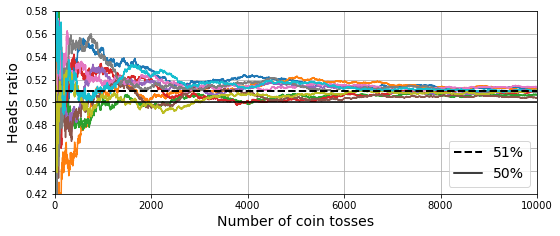

In [52]:
# extra code – this cell generates and saves Figure 7–3

import matplotlib.pyplot as plt
import numpy as np

heads_proba = 0.51
np.random.seed(42)
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads = coin_tosses.cumsum(axis=0)
cumulative_heads_ratio = cumulative_heads / np.arange(1, 10001).reshape(-1, 1)

plt.figure(figsize=(8, 3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.grid()
save_fig("law_of_large_numbers_plot")
plt.show()

## Bagging and Random Forests

In [53]:
# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=.13, random_state=SEED)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1, oob_score=True)

### Evaluate Bagging performance

In [54]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.72


In [55]:
bc.oob_score_

0.6839506172839506

In [56]:
bc.oob_decision_function_

array([[0.48980874, 0.51019126],
       [0.49869962, 0.50130038],
       [0.17443189, 0.82556811],
       [0.37307489, 0.62692511],
       [0.50785988, 0.49214012],
       [0.36183198, 0.63816802],
       [0.11903693, 0.88096307],
       [0.48310334, 0.51689666],
       [0.23425943, 0.76574057],
       [0.07818909, 0.92181091],
       [0.31686189, 0.68313811],
       [0.47176019, 0.52823981],
       [0.42924818, 0.57075182],
       [0.07573695, 0.92426305],
       [0.05634568, 0.94365432],
       [0.32258642, 0.67741358],
       [0.05738954, 0.94261046],
       [0.34048869, 0.65951131],
       [0.30611176, 0.69388824],
       [0.43811619, 0.56188381],
       [0.46463599, 0.53536401],
       [0.07933463, 0.92066537],
       [0.40463818, 0.59536182],
       [0.28164558, 0.71835442],
       [0.17877007, 0.82122993],
       [0.13164425, 0.86835575],
       [0.2809815 , 0.7190185 ],
       [0.05004601, 0.94995399],
       [0.24823584, 0.75176416],
       [0.27876141, 0.72123859],
       [0.

### Decison Tee VS Decidion Tree with Bagging

In [57]:
from sklearn.datasets import make_moons

In [58]:
X_, y_ = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_, y_, random_state=42)

In [59]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

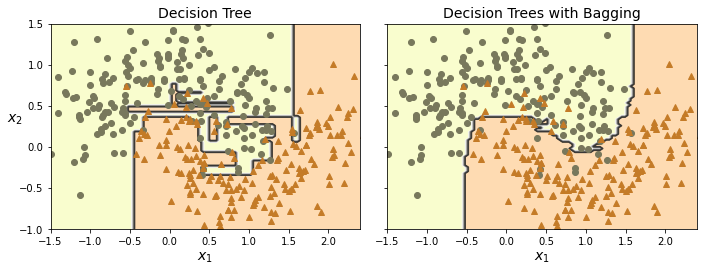

In [60]:
def plot_decision_boundary(clf, X, y, alpha=1.0):
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Trees with Bagging")
plt.ylabel("")
save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

## Out of Bag Evaluation

In [61]:
X_train, X_test,  y_train, y_test = sklearn.model_selection.train_test_split(X, y, stratify=y, test_size=.2, random_state=SEED)

In [62]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

### OOB Score vs Test Set Score

In [63]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.698, OOB accuracy: 0.702


## Random Forests (RF)

In [64]:
bikes.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [65]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [66]:
# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)

In [67]:
y=bikes[["cnt"]]
X=bikes.drop(["cnt"],axis=1)

In [68]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED)

In [69]:
rf.fit(X_train, y_train) 

<ipython-input-69-5ac8e2140e08>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=25, random_state=2)

In [70]:
# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,y_pred)**.5

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 51.84


### Visualizing features importances

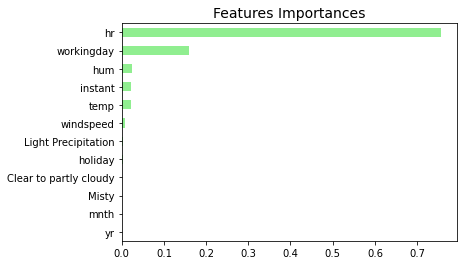

In [71]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [72]:
#conda install -c conda-forge dtreeviz

In [73]:
#!pip install dtreeviz

In [74]:
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.tree import DecisionTreeRegressor
#from dtreeviz.trees import *

#df_cars = pd.read_csv("cars.csv")
#X = df_cars[['WGT','ENG']]
#y = df_cars['MPG']

#dt = DecisionTreeRegressor(max_depth=3, criterion="mae")
#dt.fit(X, y)

#figsize = (6,5)
#fig = plt.figure(figsize=figsize)
#ax = fig.add_subplot(111, projection='3d')

#t = rtreeviz_bivar_3D(dt,
                      #X, y,
                      #feature_names=['Vehicle Weight', 'Horse Power'],
                      #target_name='MPG',
                      #fontsize=14,
                      #elev=20,
                      #azim=25,
                      #dist=8.2,
                      #show={'splits','title'},
                      #ax=ax)
#plt.show()

##  Boosting

### Define the AdaBoost classifier

In [75]:
liver_disease.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [76]:
X = liver_disease.drop(columns = ['Liver_disease'])
y = liver_disease['Liver_disease']

X_train, X_test,  y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=.2, random_state=SEED)

In [77]:
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

In [78]:
# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,y_pred)**.5

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.44


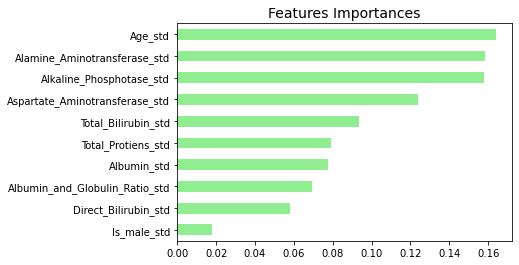

In [79]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [80]:
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

### Train the AdaBoost classifier

In [81]:
# Fit ada to the training set
ada.fit(X_train,y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

In [82]:
y_pred_proba

array([0.48766009, 0.55418951, 0.51921243, 0.43926891, 0.47732092,
       0.52519308, 0.49235486, 0.7124795 , 0.60950344, 0.55051229,
       0.59791322, 0.51055531, 0.49465367, 0.56453191, 0.48368686,
       0.5929771 , 0.57332579, 0.49180299, 0.55586567, 0.63671176,
       0.57658677, 0.49592568, 0.49968552, 0.547432  , 0.48563625,
       0.57387496, 0.50023951, 0.48951048, 0.59908865, 0.72024892,
       0.49845777, 0.5065494 , 0.49782885, 0.50678095, 0.5835487 ,
       0.66549909, 0.4123509 , 0.54528444, 0.47896774, 0.51748472,
       0.60759261, 0.60738142, 0.54538028, 0.53049161, 0.6339782 ,
       0.57093478, 0.49333084, 0.53024335, 0.66275964, 0.52892576,
       0.58952004, 0.50082124, 0.48838653, 0.58741738, 0.59396335,
       0.50161923, 0.46153584, 0.67773   , 0.47881106, 0.59482486,
       0.5401021 , 0.47374417, 0.50126468, 0.69426843, 0.50986729,
       0.57129408, 0.48797028, 0.54049242, 0.52353446, 0.52530434,
       0.64408319, 0.5767882 , 0.49458549, 0.48666719, 0.45660

### Evaluate the AdaBoost classifier

In [83]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score


In [84]:
# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.63


## Gradient Boosting (GB)

In [85]:
bikes

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,19,0,1,0.80,0.49,0.1343,452,14487,8,1,1,0,0
1484,20,0,1,0.80,0.49,0.1343,356,14488,8,1,1,0,0
1485,21,0,1,0.76,0.58,0.1940,303,14489,8,1,1,0,0
1486,22,0,1,0.76,0.58,0.1940,277,14490,8,1,1,0,0


In [86]:
y=bikes["cnt"]
X=bikes.drop(["cnt"],axis=1)

In [87]:
X_train, X_test,  y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=.2, random_state=SEED)

In [88]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

### Train the GB regressor

In [89]:
#y = column_or_1d(y, warn=True)
# Fit gb to the training set
gb.fit(X_train,y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

In [90]:
# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**.5

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 43.113


## Stochastic Gradient Boosting (SGB)

In [91]:
bikes.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [92]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=.9,
            max_features=.75,
            n_estimators=200,
            random_state=2)

In [93]:
# Fit sgbr to the training set
sgbr.fit(X_train,y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

### Evaluate the SGB regressor

In [94]:
# Compute test set MSE
mse_test = MSE(y_test,y_pred)

# Compute test set RMSE
rmse_test = mse_test**.5

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 45.143


## Model Tuning

In [95]:
liver_disease.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [96]:
X = liver_disease.drop(columns = ['Liver_disease'])
y = liver_disease['Liver_disease']

X_train, X_test,  y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=.2, random_state=42)

In [97]:
dt = sklearn.tree.DecisionTreeClassifier()

In [98]:
# Define params_dt
params_dt = {'max_depth':[2,3,4], 'min_samples_leaf':[0.12,0.14,0.16,0.18]}

In [99]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

In [100]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
             scoring='roc_auc')

In [101]:
grid_dt.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.18)

In [102]:
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.677


### Random forests hyperparameters

In [103]:
bikes.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [104]:
y=bikes["cnt"]
X=bikes.drop(["cnt"],axis=1)

In [105]:
X_train, X_test,  y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=.2, random_state=42)

In [106]:
rf = RandomForestRegressor(oob_score=True)

In [107]:
# Define the dictionary 'params_rf'
params_rf = {'n_estimators':[100, 350, 500],
             'max_features':['log2','auto','sqrt'],
             'min_samples_leaf':[2,10,30]}

### Search for the optimal forest

In [108]:
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [109]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(oob_score=True), n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [110]:
grid_rf.best_estimator_

RandomForestRegressor(min_samples_leaf=2, n_estimators=350, oob_score=True)

In [111]:
# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = (MSE(y_test, y_pred))**.5

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test))

Test RMSE of best model: 59.725


In [112]:
best_model.score(X_test,y_test)

0.9218872315311543

In [113]:
best_model.oob_score_

0.9428416425849362

In [114]:
from sklearn.tree import plot_tree

[Text(0.47451353507123073, 0.9722222222222222, 'X[0] <= 6.5\nsquared_error = 48742.381\nsamples = 749\nvalue = 298.418'),
 Text(0.17283339928769292, 0.9166666666666666, 'X[0] <= 5.5\nsquared_error = 3149.138\nsamples = 194\nvalue = 53.455'),
 Text(0.07578155916106055, 0.8611111111111112, 'X[0] <= 0.5\nsquared_error = 1549.181\nsamples = 169\nvalue = 38.18'),
 Text(0.018994855559952513, 0.8055555555555556, 'X[2] <= 0.5\nsquared_error = 2758.844\nsamples = 26\nvalue = 88.575'),
 Text(0.009497427779976256, 0.75, 'X[6] <= 13760.0\nsquared_error = 524.64\nsamples = 7\nvalue = 171.6'),
 Text(0.006331618519984171, 0.6944444444444444, 'X[6] <= 13328.0\nsquared_error = 109.347\nsamples = 5\nvalue = 184.286'),
 Text(0.0031658092599920855, 0.6388888888888888, 'squared_error = 256.0\nsamples = 2\nvalue = 175.0'),
 Text(0.009497427779976256, 0.6388888888888888, 'squared_error = 2.4\nsamples = 3\nvalue = 188.0'),
 Text(0.012663237039968342, 0.6944444444444444, 'squared_error = 242.0\nsamples = 2\nva

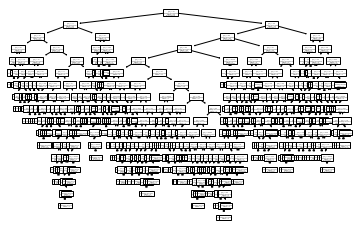

In [115]:
plot_tree(best_model.estimators_[349])

## ExtraTreesClassifier

In [116]:
from sklearn.ensemble import ExtraTreesClassifier

In [117]:
from sklearn.ensemble import ExtraTreesRegressor

In [118]:
xtr = ExtraTreesRegressor()

In [119]:
# Instantiate grid_rf
grid_xtr = GridSearchCV(estimator=xtr,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [120]:
grid_xtr.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [121]:
grid_xtr.best_estimator_

ExtraTreesRegressor(min_samples_leaf=2)

In [122]:
# Extract the best estimator
best_model = grid_xtr.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = (MSE(y_test, y_pred))**.5

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test))

Test RMSE of best model: 55.925


In [123]:
best_model

ExtraTreesRegressor(min_samples_leaf=2)

In [124]:
best_model.score(X_test,y_test)

0.9315123229427539



- `auto`: `mpg`, miles per gallon
- `bikes`: `cnt`, count of bikes rented hourly
- `liver_disease`: `Liver disease`, whether a patient suffers from liver disease (1 = yes, 0 = no)
- `wbc`: `diagnosis`, whether a tumor is malignant or benign (M = malignant, B = benign) 